# Homework 2: Bayes Optimal Classifiers

Created: 10/07/2023 by Tom Lever

Updated: 10/07/2023 by Tom Lever

"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79,354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored...[, including an indicator of whether or not] there was a success (the target variable). For the whole database considered, there were 6,499 successes."

Our data frame consists of 45,211 contacts, 5,289 of whom accepted the deposit application.

In [1]:
# read the data as a dataframe
import pandas as pd
df = pd.read_csv ('Data_Frame_Of_Info_For_Contacts_And_Indicators_Of_Whether_Contact_Established_Account.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Subset to only the columns we care about:

In [2]:
df = df[['age', 'balance', 'duration', 'y']]
df

,age,balance,duration,y
0,58,2143,261,no
1,44,29,151,no
2,33,2,76,no
3,47,1506,92,no
4,33,1,198,no
...,...,...,...,...
45206,51,825,977,yes
45207,71,1729,456,yes
45208,72,5715,1127,yes
45209,57,668,508,no


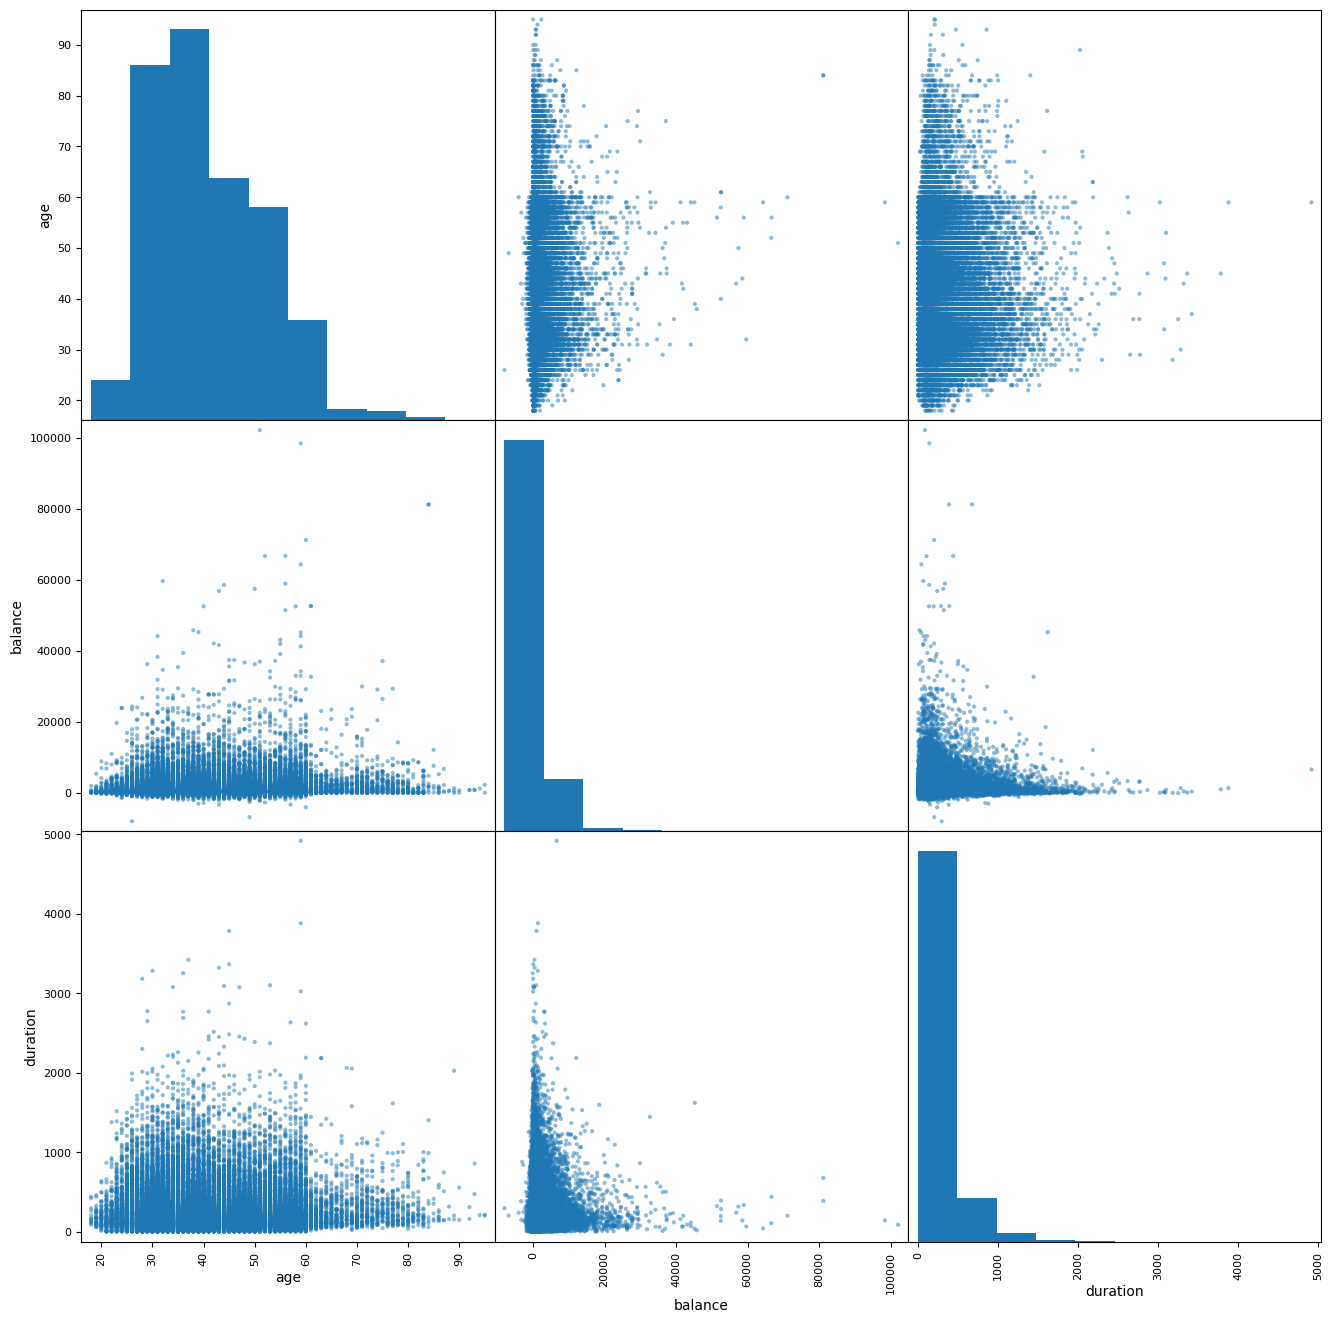

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [16, 16]
scatter_matrix(df)
# histogram of age, balance, and duration along diagonal
plt.show()

In [4]:
# check all the values in the y columns:
import numpy as np
print(np.unique(df[['y']]))

['no' 'yes']


Example code on how to compute the covariance matrix:

In [5]:
X = df[['age', 'balance', 'duration']].to_numpy()
C = np.cov(np.transpose(X))
C

array([[ 1.12758107e+02,  3.16147670e+03, -1.27117159e+01],
       [ 3.16147670e+03,  9.27059895e+06,  1.69057505e+04],
       [-1.27117159e+01,  1.69057505e+04,  6.63205741e+04]])

In [6]:
np.sqrt(C[0,0])
# Variance for age, balance, and duration along diagonal
# This number is standard deviation of age

10.618762040975422

In [7]:
np.std(df[['age']].to_numpy())

10.618644604723631

We create Bayes Optimal Decision Rules, which are functions.

# Homework #2 part (a), i
Assume Gaussian class conditional likelihoods with unequal variance-covariance matrices with each of the following additional assumptions applied singularly to each decision rule in this class:

i.  Equal class priors and equal costs for misclassification;

[NOTE:  The problem says to "create Bayes optimal decision rules" which we do by creating the functions and applying to the input data X.]

In [8]:
df['y'] == 'yes'

0        False
1        False
2        False
3        False
4        False
         ...  
45206     True
45207     True
45208     True
45209    False
45210    False
Name: y, Length: 45211, dtype: bool

In [9]:
# select yes/no subsets by condition on rows (https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)
df_n = df[df['y'] == 'no']
df_y = df[df['y'] == 'yes']
df_n

,age,balance,duration,y
0,58,2143,261,no
1,44,29,151,no
2,33,2,76,no
3,47,1506,92,no
4,33,1,198,no
...,...,...,...,...
45194,59,138,162,no
45198,37,1428,333,no
45199,34,1475,1166,no
45209,57,668,508,no


In [10]:
df_y

,age,balance,duration,y
83,59,2343,1042,yes
86,56,45,1467,yes
87,41,1270,1389,yes
129,55,2476,579,yes
168,54,184,673,yes
...,...,...,...,...
45204,73,2850,300,yes
45205,25,505,386,yes
45206,51,825,977,yes
45207,71,1729,456,yes


In [11]:
# comput the mean and coviarnace for the yes class
X_y = df_y[['age', 'balance', 'duration']].to_numpy()
print(type(X_y))
C_y = np.cov(np.transpose(X_y))
print(type(C_y))
m_y = np.mean(X_y, axis=0)
print(type(m_y))

# comput the mean and coviarnace for the no class
X_n = df_n[['age', 'balance', 'duration']].to_numpy()
C_n = np.cov(np.transpose(X_n))
m_n = np.mean(X_n, axis=0)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
print(m_n)

[  40.83898602 1303.71496919  221.18280647]


In [13]:
print(m_y)
print(C_y)

[  41.67006996 1804.26791454  537.29457364]
[[ 1.82190104e+02  5.77613361e+03 -1.48326015e+02]
 [ 5.77613361e+03  1.22577347e+07 -5.04046434e+04]
 [-1.48326015e+02 -5.04046434e+04  1.54076082e+05]]


In [14]:
# compute likelihoods
from scipy.stats import multivariate_normal

likelihoods_y = multivariate_normal.pdf(X, mean=m_y, cov=C_y)
likelihoods_n = multivariate_normal.pdf(X, mean=m_n, cov=C_n)
print(type(likelihoods_y))

<class 'numpy.ndarray'>


In [15]:
for i in range(20):
    print([likelihoods_y[i],likelihoods_n[i]])

[1.3228058603589212e-09, 2.3759731985689037e-09]
[1.793920205021604e-09, 8.257992809829403e-09]
[1.2277165486936172e-09, 5.504764997056348e-09]
[1.673117077279356e-09, 6.998369430696493e-09]
[1.7036486049284167e-09, 7.007773947536751e-09]
[1.6429805540604485e-09, 7.587341580938874e-09]
[1.3855132177217318e-09, 4.512131411915523e-09]
[2.760119179085247e-09, 6.7676189176601836e-09]
[6.377112719138397e-10, 1.5278945335607159e-09]
[1.493678885304852e-09, 7.001720409496124e-09]
[2.2405828980082904e-09, 9.556530503230233e-09]
[1.2183477438289464e-09, 4.637298191213983e-09]
[1.9991682633198926e-09, 1.49997366390845e-09]
[6.735294633219138e-10, 1.6326973448476447e-09]
[9.877963813269392e-10, 2.448319676561215e-09]
[2.1070613189974774e-09, 4.4949745337475405e-09]
[1.5208587667286832e-09, 7.051100068260172e-09]
[6.629749110333398e-10, 1.6958225189676603e-09]
[7.994143134279697e-10, 1.4461630376561705e-09]
[1.1450810409160382e-09, 5.07829323952385e-09]


In [16]:
print(len(likelihoods_y))

45211


In [17]:
prior_y = 0.5
prior_n = 0.5

In [18]:
probabilities_y = (likelihoods_y*prior_y)/(likelihoods_y*prior_y + likelihoods_n*prior_n)
probabilities_n = (likelihoods_n*prior_n)/(likelihoods_y*prior_y + likelihoods_n*prior_n)
print(probabilities_y)
print(probabilities_n)

[0.35763311 0.17846555 0.18235721 ... 0.99994564 0.61809232 0.30109016]
[6.42366889e-01 8.21534448e-01 8.17642790e-01 ... 5.43628096e-05
 3.81907678e-01 6.98909836e-01]


In [19]:
for i in range(20000,20000+10):
    print([probabilities_y[i],probabilities_n[i]], df['y'][i])

[0.18670820235797364, 0.8132917976420263] no
[0.1777049011280699, 0.8222950988719301] no
[0.44811105344869245, 0.5518889465513076] no
[0.30514918194152646, 0.6948508180584736] no
[0.18654911429683696, 0.813450885703163] no
[0.17598084179838144, 0.8240191582016185] no
[0.23494206460993325, 0.7650579353900667] no
[0.5260596777021603, 0.4739403222978397] no
[0.20435126599618725, 0.7956487340038129] no
[0.8763102606986296, 0.12368973930137042] yes


Eventually you will compute cost for each misclassificaiton type as follows:

In [20]:
cost_yes_as_yes = 0
cost_no_as_yes = 10
cost_yes_as_no = 10
cost_no_as_no = 0

In [21]:
# compute the expected value for the cost for labeling as 'yes'
cost_yes = probabilities_y*cost_yes_as_yes + probabilities_n*cost_no_as_yes
print(cost_yes)

# compute the expected value for the cost for labeling as 'no'
cost_no = probabilities_y*cost_yes_as_no + probabilities_n*cost_no_as_no
print(cost_no)

[6.42366889e+00 8.21534448e+00 8.17642790e+00 ... 5.43628096e-04
 3.81907678e+00 6.98909836e+00]
[3.57633111 1.78465552 1.8235721  ... 9.99945637 6.18092322 3.01090164]


In [22]:
for i in range(20000,20000+10):
    print([cost_yes[i],cost_no[i]], df['y'][i])

[8.132917976420263, 1.8670820235797363] no
[8.222950988719301, 1.777049011280699] no
[5.518889465513076, 4.481110534486924] no
[6.948508180584736, 3.0514918194152645] no
[8.13450885703163, 1.8654911429683696] no
[8.240191582016186, 1.7598084179838145] no
[7.6505793539006675, 2.3494206460993325] no
[4.739403222978397, 5.260596777021603] no
[7.956487340038128, 2.0435126599618725] no
[1.2368973930137042, 8.763102606986296] yes


Text(0.5, 1.0, 'Costs for Classification as Yes and No With Actual Outcomes, sorted by P(yes)')

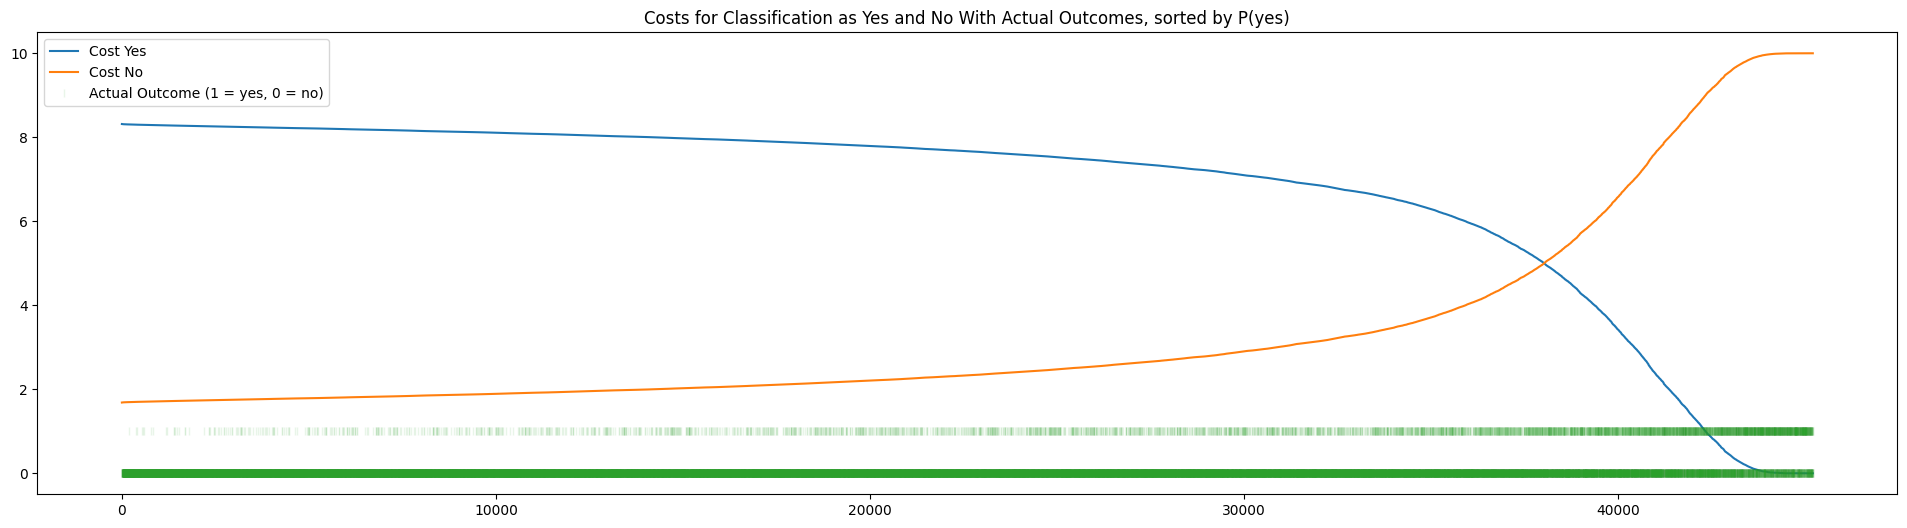

In [23]:
fig = plt.figure(figsize=(24,6))
plt.plot(cost_yes[np.argsort(probabilities_y)],label='Cost Yes')
plt.plot(cost_no[np.argsort(probabilities_y)],label='Cost No')
y_numerical= np.asarray([df[['y']]=='yes']).flatten()
plt.plot(y_numerical[np.argsort(probabilities_y)],linestyle='None', marker = '|',label='Actual Outcome (1 = yes, 0 = no)', alpha=0.1)
plt.legend()
plt.title('Costs for Classification as Yes and No With Actual Outcomes, sorted by P(yes)')

BAYES OPTIOMAL SOLUTION:  Categorize every person to the right of the yes-no intersection as a yes will minimize cost.****

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
def predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, prior_probability_that_contact_will_establish_account, costs, are_arrays_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_and_did_not_establish_accounts_equal, type_of_distribution):
    data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account = pd.read_csv('Data_Frame_Of_Info_For_Contacts_And_Indicators_Of_Whether_Contact_Established_Account.csv', sep=';')
    mask_for_selecting_contacts_that_established_accounts = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account['y'] == 'yes'
    mask_for_selecting_contacts_that_did_not_establish_accounts = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account['y'] == 'no'
    data_frame_of_info_for_contacts_and_indicators_that_contact_established_account = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account[mask_for_selecting_contacts_that_established_accounts]
    data_frame_of_info_for_contacts_and_indicators_that_contact_did_not_establish_account = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account[mask_for_selecting_contacts_that_did_not_establish_accounts]
    number_of_contacts = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account.shape[0]
    number_of_contacts_that_established_account = data_frame_of_info_for_contacts_and_indicators_that_contact_established_account.shape[0]
    number_of_contacts_that_did_not_establish_account = data_frame_of_info_for_contacts_and_indicators_that_contact_did_not_establish_account.shape[0]
    array_of_ages_balances_and_durations = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account[['age', 'balance', 'duration']].to_numpy()
    array_of_ages_balances_and_durations_for_contacts_who_established_accounts = data_frame_of_info_for_contacts_and_indicators_that_contact_established_account[['age', 'balance', 'duration']].to_numpy()
    array_of_ages_balances_and_durations_for_contacts_who_did_not_establish_accounts = data_frame_of_info_for_contacts_and_indicators_that_contact_did_not_establish_account[['age', 'balance', 'duration']].to_numpy()
    array_of_means_of_age_balance_and_duration = np.mean(array_of_ages_balances_and_durations, axis = 0)
    array_of_means_of_age_balance_and_duration_for_contacts_who_established_accounts = np.mean(array_of_ages_balances_and_durations_for_contacts_who_established_accounts, axis = 0)
    array_of_means_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts = np.mean(array_of_ages_balances_and_durations_for_contacts_who_did_not_establish_accounts, axis = 0)
    array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_accounts = np.cov(np.transpose(array_of_ages_balances_and_durations_for_contacts_who_established_accounts))
    array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts = np.cov(np.transpose(array_of_ages_balances_and_durations_for_contacts_who_did_not_establish_accounts))
    array_of_pooled_variances_and_covariances_of_age_balance_and_duration = (
        1 / (number_of_contacts_that_established_account + number_of_contacts_that_did_not_establish_account)
        * (
            number_of_contacts_that_established_account * array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_accounts
            + number_of_contacts_that_did_not_establish_account * array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts
        )
    )
    if type_of_distribution == "multivariate normal":
        if are_arrays_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_and_did_not_establish_accounts_equal:
            variance_covariance_matrix = array_of_pooled_variances_and_covariances_of_age_balance_and_duration
        else:
            variance_covariance_matrix = array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_accounts
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_established_accounts = scipy.stats.multivariate_normal.pdf(
            x = array_of_ages_balances_and_durations,
            mean = array_of_means_of_age_balance_and_duration_for_contacts_who_established_accounts,
            cov = variance_covariance_matrix
        )
    elif type_of_distribution == "multivariate Student's t":
        if are_arrays_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_and_did_not_establish_accounts_equal:
            number_of_degrees_of_freedom = number_of_contacts - 1
            scale = (number_of_degrees_of_freedom - 2) / number_of_degrees_of_freedom
            shape_matrix = array_of_pooled_variances_and_covariances_of_age_balance_and_duration * scale
        else:
            number_of_degrees_of_freedom = number_of_contacts_that_established_account - 1
            scale = (number_of_degrees_of_freedom - 2) / number_of_degrees_of_freedom
            shape_matrix = array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_accounts * scale
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_established_accounts = scipy.stats.multivariate_t.pdf(
            x = array_of_ages_balances_and_durations,
            loc = array_of_means_of_age_balance_and_duration_for_contacts_who_established_accounts,
            shape = shape_matrix,
            df = number_of_degrees_of_freedom
        )
    else:
        raise Exception("Provided type of distribution is not supported.")
    if type_of_distribution == "multivariate normal":
        if are_arrays_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_and_did_not_establish_accounts_equal:
            variance_covariance_matrix = array_of_pooled_variances_and_covariances_of_age_balance_and_duration
        else:
            variance_covariance_matrix = array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_did_not_establish_accounts = scipy.stats.multivariate_normal.pdf(
            x = array_of_ages_balances_and_durations,
            mean = array_of_means_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts,
            cov = variance_covariance_matrix
        )
    elif type_of_distribution == "multivariate Student's t":
        if are_arrays_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_established_and_did_not_establish_accounts_equal:
            number_of_degrees_of_freedom = number_of_contacts - 1
            scale = (number_of_degrees_of_freedom - 2) / number_of_degrees_of_freedom
            shape_matrix = array_of_pooled_variances_and_covariances_of_age_balance_and_duration * scale
        else:
            number_of_degrees_of_freedom = number_of_contacts_that_did_not_establish_account - 1
            scale = (number_of_degrees_of_freedom - 2) / number_of_degrees_of_freedom
            shape_matrix = array_of_variances_and_covariances_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts * scale
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_did_not_establish_accounts = scipy.stats.multivariate_t.pdf(
            x = array_of_ages_balances_and_durations,
            loc = array_of_means_of_age_balance_and_duration_for_contacts_who_did_not_establish_accounts,
            shape = shape_matrix,
            df = number_of_degrees_of_freedom
        )
    else:
        raise Exception("Provided type of distribution is not supported.")
    prior_probability_that_contact_will_not_establish_account = 1 - prior_probability_that_contact_will_establish_account
    array_of_total_and_marginal_probabilities = (
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_established_accounts * prior_probability_that_contact_will_establish_account
        + array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_did_not_establish_accounts * prior_probability_that_contact_will_not_establish_account
    )
    array_of_posterior_probabilities_that_contacts_will_establish_account_given_ages_balances_and_durations = (
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_established_accounts
        * prior_probability_that_contact_will_establish_account
        / array_of_total_and_marginal_probabilities
    )
    array_of_posterior_probabilities_that_contacts_will_not_establish_account_given_ages_balances_and_durations = (
        array_of_likelihoods_of_array_of_ages_balances_and_durations_given_contacts_did_not_establish_accounts
        * prior_probability_that_contact_will_not_establish_account
        / array_of_total_and_marginal_probabilities
    )
    cost_of_construing_yes_as_yes = costs[0] # cost of True Positive
    cost_of_classifying_a_customer_as_a_new_service_candidate_when_the_customer_is_not_a_new_service_candidate = costs[1] # cost of construing no as yes
    cost_of_classifying_a_customer_as_not_a_new_service_candidate_when_the_customer_is_a_new_service_candidate = costs[2] # cost_of_construing_yes_as_no
    cost_of_construing_no_as_no = costs[3] # cost of True Negative
    array_of_expected_values_of_cost_of_labeling_yes = (
        array_of_posterior_probabilities_that_contacts_will_establish_account_given_ages_balances_and_durations * cost_of_construing_yes_as_yes
        + array_of_posterior_probabilities_that_contacts_will_not_establish_account_given_ages_balances_and_durations * cost_of_classifying_a_customer_as_a_new_service_candidate_when_the_customer_is_not_a_new_service_candidate
    )
    array_of_expected_values_of_cost_of_labeling_no = (
        array_of_posterior_probabilities_that_contacts_will_establish_account_given_ages_balances_and_durations * cost_of_classifying_a_customer_as_not_a_new_service_candidate_when_the_customer_is_a_new_service_candidate
        + array_of_posterior_probabilities_that_contacts_will_not_establish_account_given_ages_balances_and_durations * cost_of_construing_no_as_no
    )
    # Expected value of cost of labeling yes decreases as posterior probability that contact will establish account given age, balance, and duration increases.
    array_of_indices_that_would_sort_in_ascending_order_array_of_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations = np.argsort(array_of_posterior_probabilities_that_contacts_will_establish_account_given_ages_balances_and_durations)
    array_of_expected_values_of_cost_of_labeling_yes_corresponding_to_sorted_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations = array_of_expected_values_of_cost_of_labeling_yes[array_of_indices_that_would_sort_in_ascending_order_array_of_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations]
    array_of_expected_values_of_cost_of_labeling_no_corresponding_to_sorted_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations = array_of_expected_values_of_cost_of_labeling_no[array_of_indices_that_would_sort_in_ascending_order_array_of_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations]
    data_frame_of_persons_posterior_probabilities_expected_values_of_cost_of_labeling_yes_and_no_and_predictions = pd.DataFrame({
        "Person": array_of_indices_that_would_sort_in_ascending_order_array_of_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations,
        "P(yes | age, balance, duration)": array_of_posterior_probabilities_that_contacts_will_establish_account_given_ages_balances_and_durations[array_of_indices_that_would_sort_in_ascending_order_array_of_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations],
        "E[C(yes)]": array_of_expected_values_of_cost_of_labeling_yes_corresponding_to_sorted_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations,
        "E[C(no)]": array_of_expected_values_of_cost_of_labeling_no_corresponding_to_sorted_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations,
        "Prediction": "no"
    })
    fig = plt.figure(figsize=(24,6))
    plt.plot(array_of_expected_values_of_cost_of_labeling_yes_corresponding_to_sorted_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations, label = 'E[C(yes)]')
    plt.plot(array_of_expected_values_of_cost_of_labeling_no_corresponding_to_sorted_posterior_probabilities_that_contacts_will_establish_accounts_given_ages_balances_and_durations, label = 'E[C(no)]')
    plt.legend()
    plt.title('Arrays Of Expected Values Of Costs Of Labeling Yes And No\nCorresponding To Sorted Posterior Probabilities\nThat Contacts Will Establish Accounts\nGiven Ages, Balances, and Durations')
    plt.show()
    mask_for_selecting_persons_where_expected_value_of_cost_of_labeling_yes_is_less_than_expected_value_of_cost_labeling_no = data_frame_of_persons_posterior_probabilities_expected_values_of_cost_of_labeling_yes_and_no_and_predictions["E[C(yes)]"] < data_frame_of_persons_posterior_probabilities_expected_values_of_cost_of_labeling_yes_and_no_and_predictions["E[C(no)]"]
    data_frame_of_persons_posterior_probabilities_expected_values_of_cost_of_labeling_yes_and_no_and_predictions[mask_for_selecting_persons_where_expected_value_of_cost_of_labeling_yes_is_less_than_expected_value_of_cost_labeling_no] = "yes"
    print(data_frame_of_persons_posterior_probabilities_expected_values_of_cost_of_labeling_yes_and_no_and_predictions)
data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account = pd.read_csv('Data_Frame_Of_Info_For_Contacts_And_Indicators_Of_Whether_Contact_Established_Account.csv', sep=';')
array_of_ages_balances_and_durations = data_frame_of_info_for_contacts_and_indicators_of_whether_contact_established_account[['age', 'balance', 'duration']].to_numpy()

Create a Bayes optimal decision rule assuming Gaussian likelihood density distributions with unequal variance-covariance matrices, equal class prior probabilities $0.5$, and equal costs for misclassification.

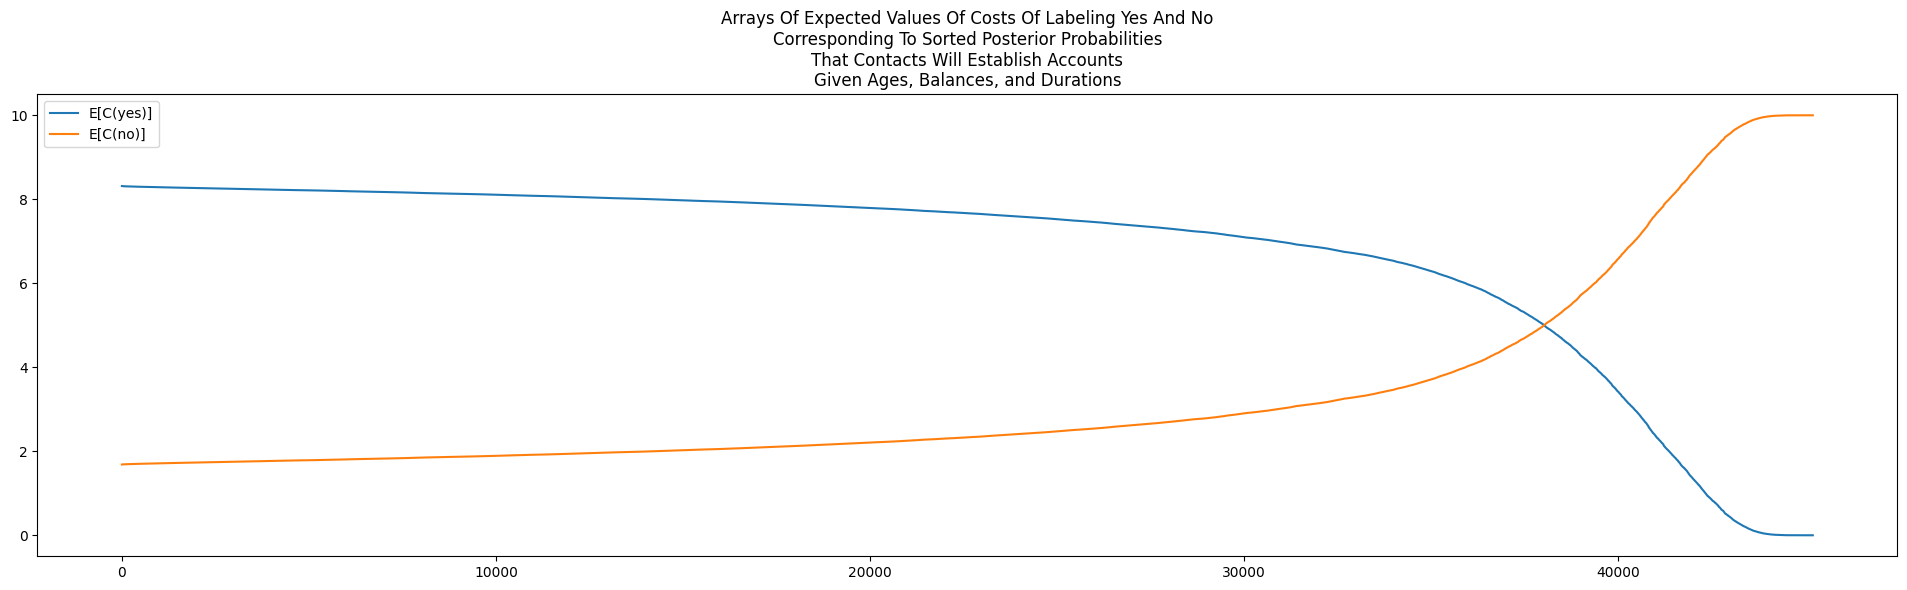

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      19999                        0.168472  8.315284  1.684716         no
1      34803                        0.168487  8.315126  1.684874         no
2       1845                        0.168511   8.31489   1.68511         no
3       7519                        0.168583  8.314169  1.685831         no
4      35241                        0.168583  8.314168  1.685832         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [25]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 0.5, (0, 10, 10, 0), False, "multivariate normal")

Create a Bayes optimal decision rule assuming Gaussian likelihood density distributions with unequal variance-covariance matrices, prior probability for not selecting new bank service $0.9$, and equal costs for misclassification.

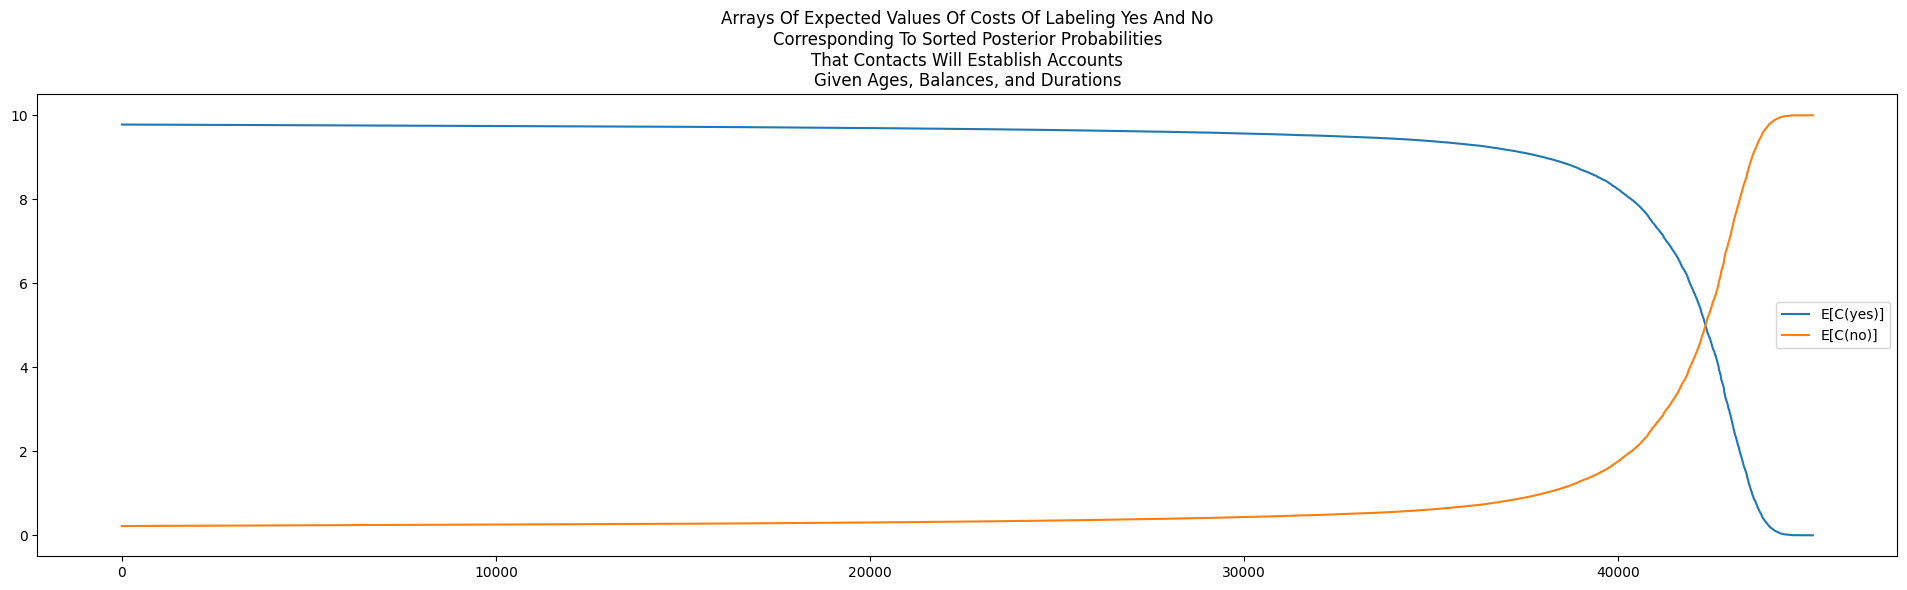

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      19999                        0.022016   9.77984   0.22016         no
1      34803                        0.022018  9.779815  0.220185         no
2       1845                        0.022022  9.779779  0.220221         no
3       7519                        0.022033  9.779668  0.220332         no
4      35241                        0.022033  9.779668  0.220332         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [26]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 1 - 0.9, (0, 10, 10, 0), False, "multivariate normal")

Create a Bayes optimal decision rule assuming Gaussian likelihood density distributions with unequal variance-covariance matrices, prior probability for not selecting new bank service $0.9$, and cost of classifying customer as not a new service candidate when they are a new service customer 15 times cost of classifying a customer as a new service customer when they are not a new service customer.

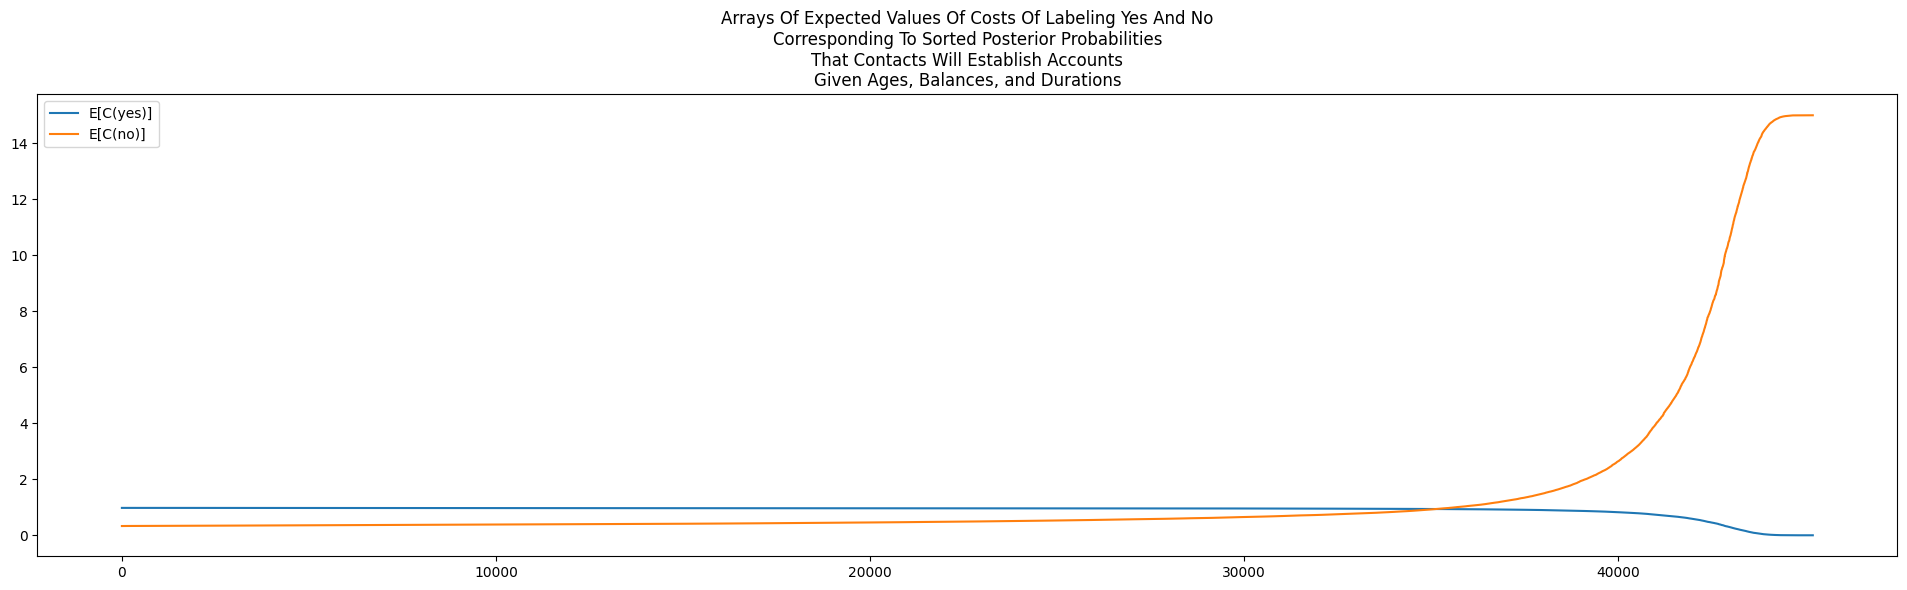

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      19999                        0.022016  0.977984   0.33024         no
1      34803                        0.022018  0.977982  0.330277         no
2       1845                        0.022022  0.977978  0.330331         no
3       7519                        0.022033  0.977967  0.330497         no
4      35241                        0.022033  0.977967  0.330498         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [27]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 1 - 0.9, (0, 1, 15, 0), False, "multivariate normal")

Create a Bayes optimal decision rule assuming Gaussian likelihood density distributions with equal and pooled variance-covariance matrices, equal class prior probabilities $0.5$, and equal costs for misclassification.

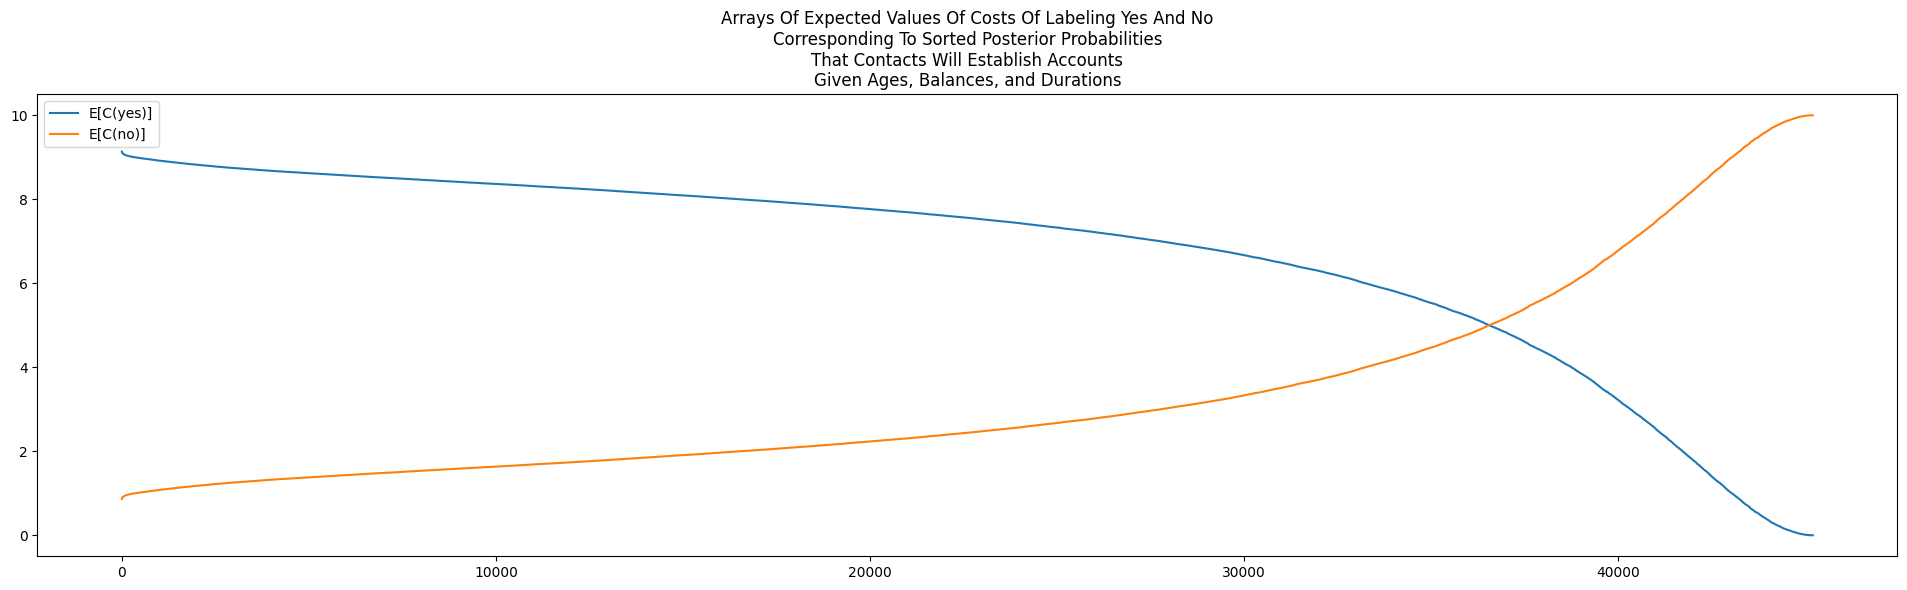

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      44964                        0.086496  9.135036  0.864964         no
1      39271                        0.087481   9.12519   0.87481         no
2      44601                        0.087658  9.123421  0.876579         no
3      44776                        0.088215  9.117852  0.882148         no
4       6501                         0.08833  9.116699  0.883301         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [28]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 0.5, (0, 10, 10, 0), True, "multivariate normal")

Create a Bayes optimal decision rule assuming Gaussian likelihood density distributions with equal and pooled variance-covariance matrices, prior probability for not selecting new bank service $0.9$, and equal costs for misclassification.

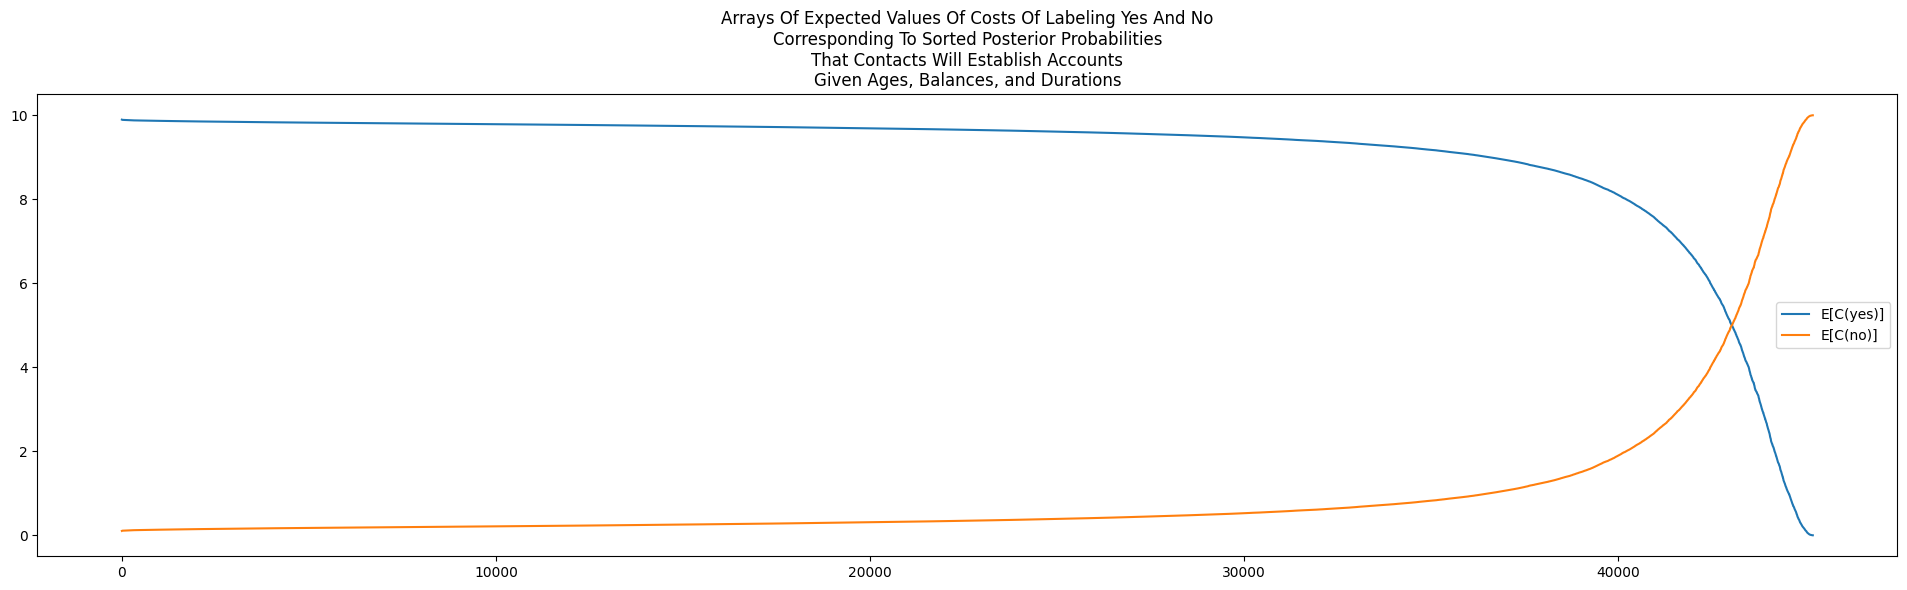

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      44964                        0.010411  9.895888  0.104112         no
1      39271                         0.01054  9.894603  0.105397         no
2      44601                        0.010563  9.894372  0.105628         no
3      44776                        0.010636  9.893644  0.106356         no
4       6501                        0.010651  9.893493  0.106507         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [29]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 1 - 0.9, (0, 10, 10, 0), True, "multivariate normal")

Create a Bayes optimal decision rule assuming Gaussian likelihood density distributions with equal and pooled variance-covariance matrices, prior probability for not selecting new bank service $0.9$, and cost of classifying customer as not a new service candidate when they are a new service customer 15 times cost of classifying a customer as a new service customer when they are not a new service customer.

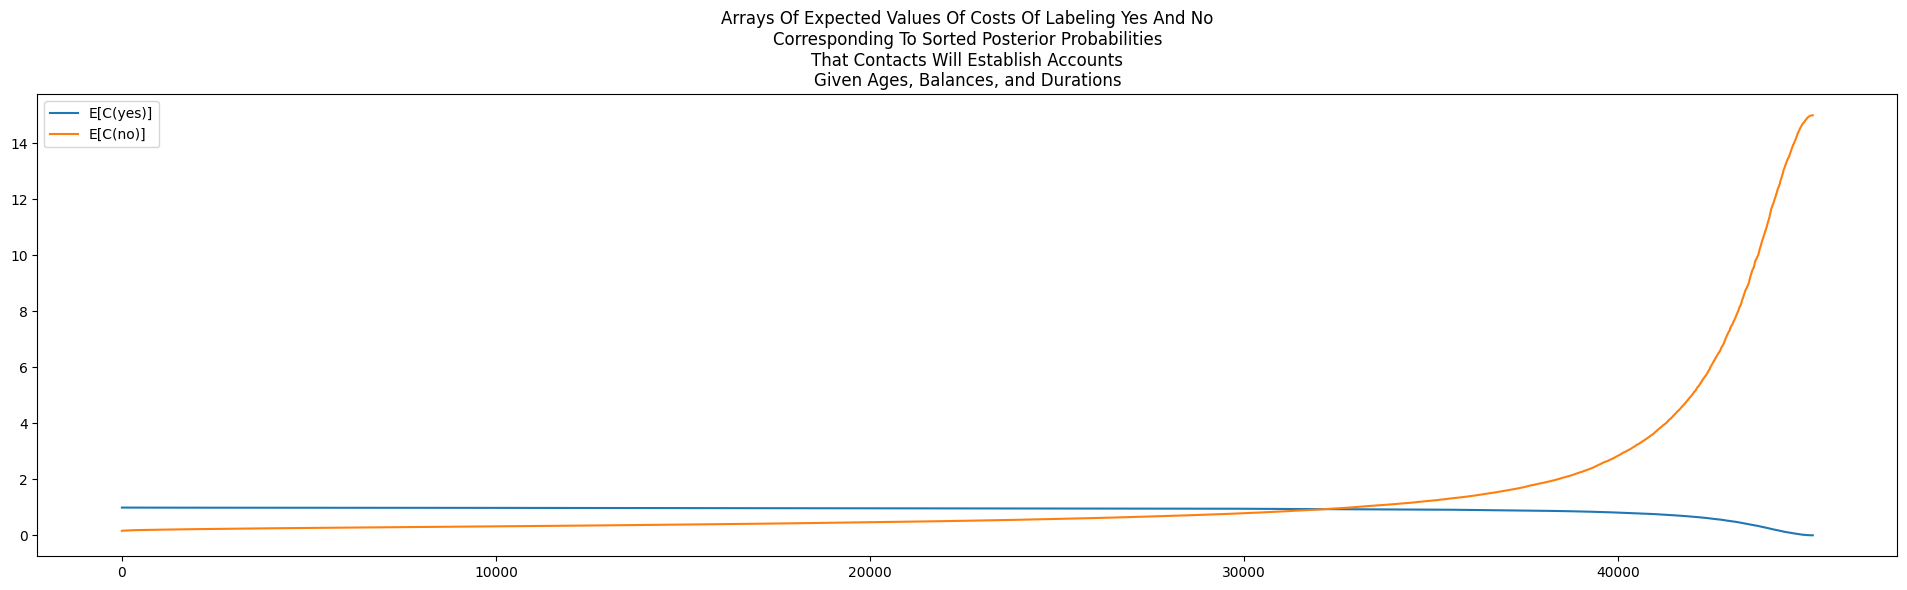

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      44964                        0.010411  0.989589  0.156168         no
1      39271                         0.01054   0.98946  0.158095         no
2      44601                        0.010563  0.989437  0.158442         no
3      44776                        0.010636  0.989364  0.159534         no
4       6501                        0.010651  0.989349   0.15976         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [30]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 1 - 0.9, (0, 1, 15, 0), True, "multivariate normal")

Create a Bayes optimal decision rule assuming multivariate Student's $t$ likelihood density distributions with equal and pooled variance-covariance matrices, equal class prior probabilities $0.5$, and equal costs for misclassification.

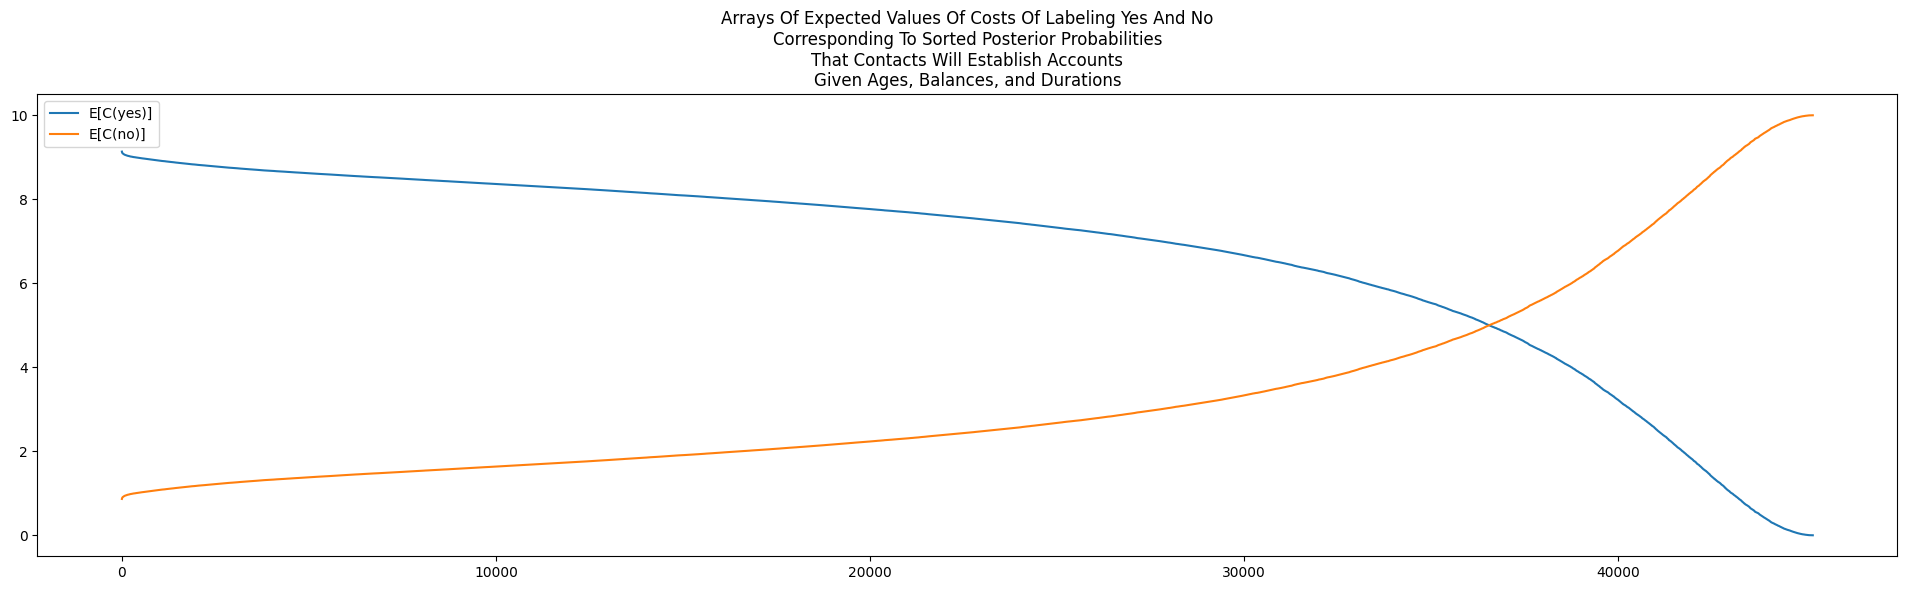

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      44964                        0.086504  9.134962  0.865038         no
1      39271                        0.087485  9.125154  0.874846         no
2      44601                        0.087663  9.123374  0.876626         no
3      44776                        0.088221  9.117794  0.882206         no
4       6501                        0.088332  9.116677  0.883323         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [31]:
# According to Dr. Basener, Student's t distributions are used when we do not have a lot of data.
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 0.5, (0, 10, 10, 0), True, "multivariate Student's t")

Create a Bayes optimal decision rule assuming multivariate Student's $t$ likelihood density distributions with equal and pooled variance-covariance matrices, prior probability for not selecting new bank service $0.9$, and equal costs for misclassification.

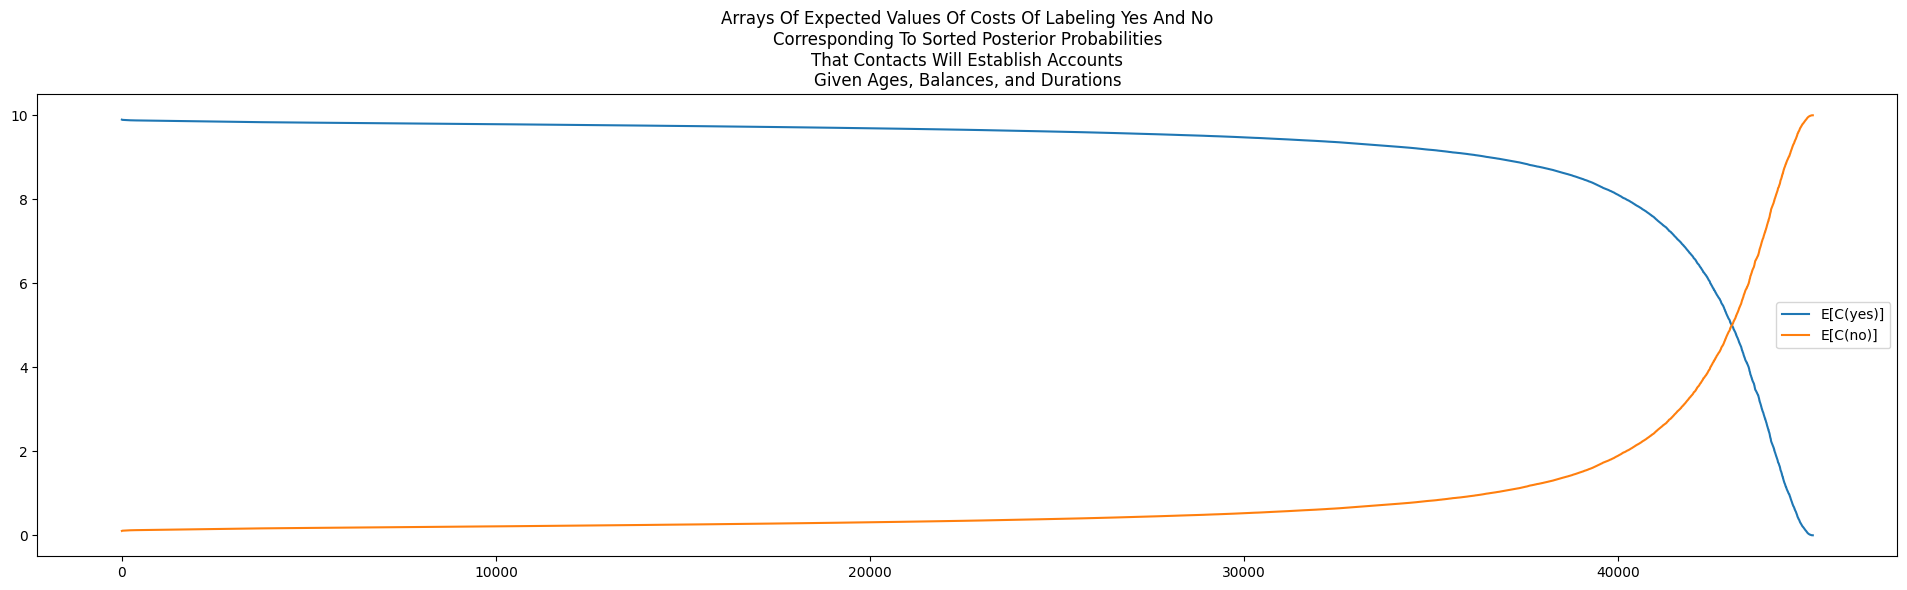

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      44964                        0.010412  9.895879  0.104121         no
1      39271                         0.01054  9.894598  0.105402         no
2      44601                        0.010563  9.894366  0.105634         no
3      44776                        0.010636  9.893636  0.106364         no
4       6501                        0.010651   9.89349   0.10651         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [32]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 1 - 0.9, (0, 10, 10, 0), True, "multivariate Student's t")

Create a Bayes optimal decision rule assuming multivariate Student's $t$ likelihood density distributions with equal and pooled variance-covariance matrices, prior probability for not selecting new bank service $0.9$, and cost of classifying customer as not a new service candidate when they are a new service customer $15$ times cost of classifying a customer as a new service customer when they are not a new service customer.

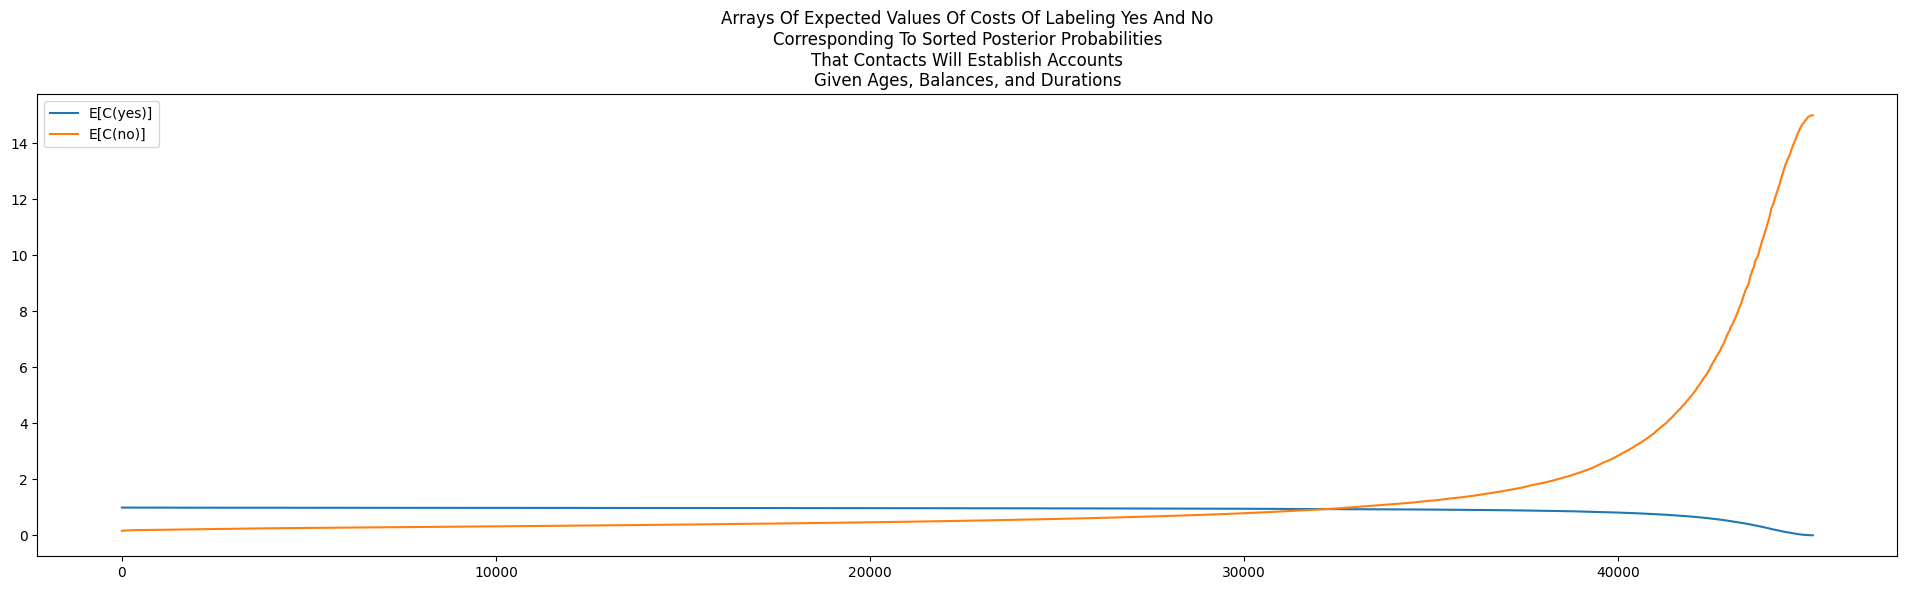

      Person P(yes | age, balance, duration) E[C(yes)]  E[C(no)] Prediction
0      44964                        0.010412  0.989588  0.156182         no
1      39271                         0.01054   0.98946  0.158102         no
2      44601                        0.010563  0.989437  0.158451         no
3      44776                        0.010636  0.989364  0.159546         no
4       6501                        0.010651  0.989349  0.159765         no
...      ...                             ...       ...       ...        ...
45206    yes                             yes       yes       yes        yes
45207    yes                             yes       yes       yes        yes
45208    yes                             yes       yes       yes        yes
45209    yes                             yes       yes       yes        yes
45210    yes                             yes       yes       yes        yes

[45211 rows x 5 columns]


In [33]:
predict_whether_or_not_contact_will_establish_account(array_of_ages_balances_and_durations, 1 - 0.9, (0, 1, 15, 0), True, "multivariate Student's t")